In [2]:
import matplotlib.pyplot as plt
import numpy as np

from os import listdir

from keras import models
from keras import layers

from sklearn.metrics import confusion_matrix #, f1_score
# np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

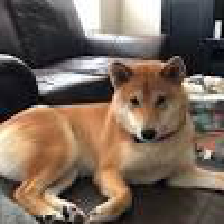

In [87]:
load_img('./shiba/images(8)', target_size = (224,224))

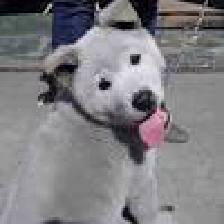

In [88]:
load_img('./jindo/images(1)', target_size = (224,224))

In [89]:
#create list containers for arrays of images and their labels
images, labels = list(), list()

#parse through all files in jindo directory to append a resized array and target label to containers
for jindo_img in listdir('./jindo'):
    #jindo class will be 0
    target = 0.
    
    #handle avoiding loading hidden files (such as .DS store)
    if jindo_img.startswith('.'):
        continue
    #create string path and use to load images and array
    path = './jindo/{}'.format(jindo_img)
    image_load = load_img(path, target_size = (224,224))
    array_load = img_to_array(image_load)
    
    images.append(array_load)
    labels.append(target)

#parse through all files in shiba directory
for shiba_img in listdir('./shiba'):
    #shiba class is 1
    target = 1.
    
    if shiba_img.startswith('.'):
        continue
        
    path = './shiba/{}'.format(shiba_img)
    image_load = load_img(path, target_size = (224,224))
    array_load = img_to_array(image_load)
    
    images.append(array_load)
    labels.append(target)

#print sum length of list of both directories and length of images in list
len(listdir('./jindo')) + len(listdir('./shiba')), len(images) #552, 550 (difference from hidden files)

(552, 550)

In [90]:
#convert list image arrays and labels into numpy array for model fitting
images = np.asarray(images)
labels = np.asarray(labels)
# #save arrays
# np.save('images.npy', images)
# np.save('labels.npy', labels)

In [7]:
# images = np.load('images.npy')
# labels = np.load('labels.npy')

In [91]:
#split data into model set and test set
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [92]:
#split model set into train and testing
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [93]:
labels[:5] , labels[-5:]

(array([0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1.]))

In [94]:
X_train.shape

(352, 224, 224, 3)

In [97]:
cnn = models.Sequential()

#feature learning
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.MaxPooling2D((2, 2)))
# cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
# cnn.add(layers.MaxPooling2D((2, 2)))

#classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [98]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Train on 352 samples, validate on 88 samples
Epoch 1/10
352/352 [==============================] - 35s 100ms/step - loss: 3730.8472 - acc: 0.5511 - val_loss: 55.9554 - val_acc: 0.4773
Epoch 2/10
352/352 [==============================] - 28s 80ms/step - loss: 18.4889 - acc: 0.4744 - val_loss: 0.6931 - val_acc: 0.5227
Epoch 3/10
352/352 [==============================] - 33s 93ms/step - loss: 0.6933 - acc: 0.4489 - val_loss: 0.6931 - val_acc: 0.5227
Epoch 4/10
352/352 [==============================] - 26s 74ms/step - loss: 0.6932 - acc: 0.4489 - val_loss: 0.6931 - val_acc: 0.5227
Epoch 5/10
352/352 [==============================] - 24s 69ms/step - loss: 0.6932 - acc: 0.4489 - val_loss: 0.6931 - val_acc: 0.5227
Epoch 6/10
352/352 [==============================] - 24s 69ms/step - loss: 0.6931 - acc: 0.5341 - val_loss: 0.6932 - val_acc: 0.4773
Epoch 7/10
352/352 [==============================] - 24s 67ms/step - loss: 0.6931 - acc: 0.5511 - val_loss: 0.6932 - val_acc: 0.4773
Epoch 8/10


In [99]:
#epoch = 10, batch = 50
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

110/110 [==============================] - 3s 24ms/step
[0.6927572705528953, 0.5511363744735718] [0.6925894368778576, 0.5727272629737854]


In [100]:
predictions_transfer = cnn.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

Confusion matrix, without normalization
[[ 0 47]
 [ 0 63]]


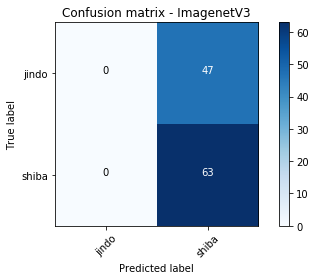

In [101]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions_transfer), classes=['jindo', 'shiba'], normalize=False,
                      title='Confusion matrix - ImagenetV3')

# Results

The model is just predicting everything to be a shibas. By predicting one class, the accuracy is consistently either 0.57 or 0.43 depending on which the set has more of which is shown in all of the epochs.



Something is definitely wrong and it may be:
1. Not enough data, usually you would want 1000 images for each class while here I only have 550 for 2 classes. need to do some data augmentation
2. Bad data, not uniform images.
3. Slight class imbalance, which may be fixed from data augmenting

In [80]:
def predictoneimage_cnn(model, path):
    img = load_img(path, target_size=(224,224))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    return predict

array([[0.50401247]], dtype=float32)

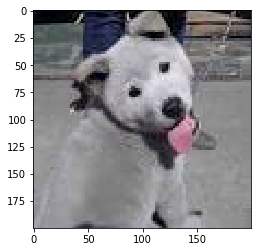

In [81]:
#predicting on one image for some reason returns a float rather than an integer. 
#could it be that I am loading my data in improperly
predictoneimage_cnn(cnn, './jindo/images(1)')